In [1]:
from IPython.core.display import HTML, display
display(HTML("<style>.container { width:100% !important; } </style>"))

# Introduction to Tensor Flow

In this notebook we show how to find the minimum of the function
$$ x \mapsto \exp(x) - 2 \cdot x^2 + 1. $$
As we want to plot this function, we load both the module <tt>numpy</tt> and <tt>matplotlib</tt> first.

In [2]:
import numpy as np

In [3]:
import matplotlib.pyplot as plt
import seaborn           as sns

First, we define the function $x \mapsto \exp(x) - 2 \cdot x^2 + 1$ as a Python function.

In [4]:
def fm(x):
    return np.exp(x) - 2 * x**2 + 1

Next, we plot this function.

Text(0.5, 1.0, 'x |-> exp(x) - 2 * x**2 + 1')

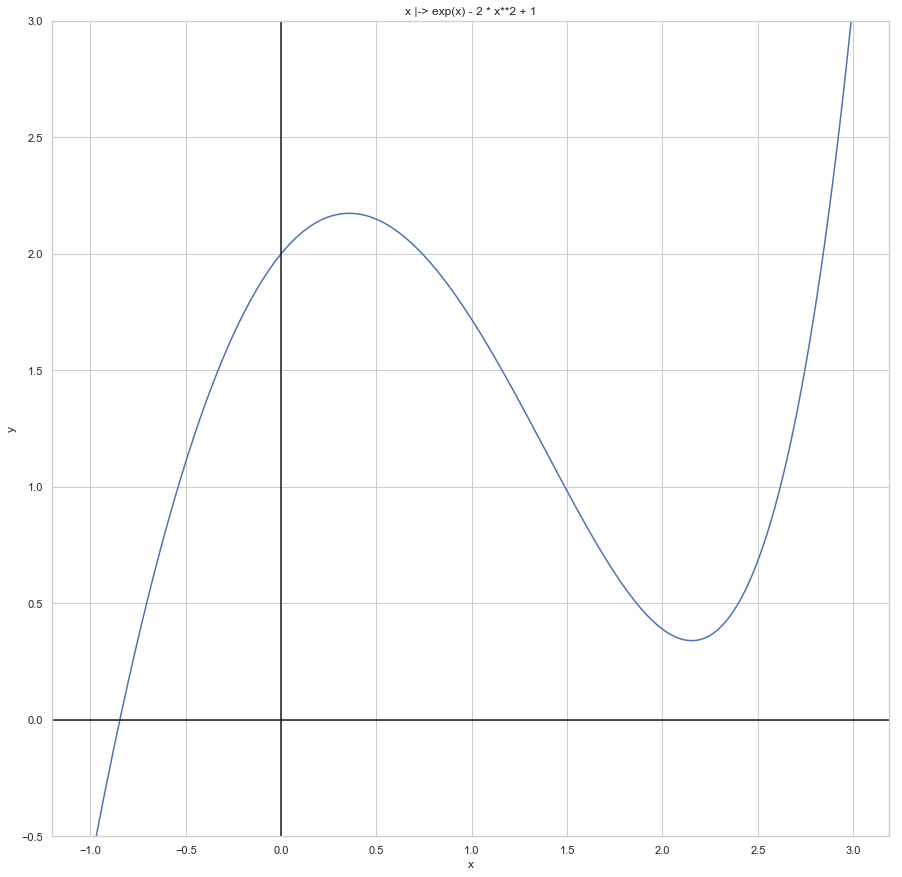

In [5]:
Xs = np.arange(-1.0, 3, 0.01)
Ys = fm(Xs)
plt.figure(figsize=(15,15))
sns.set(style='whitegrid')
sns.lineplot(Xs, Ys, color='b')
plt.axvline(x=0.0, c='k')
plt.axhline(y=0.0, c='k')
plt.ylim(-0.5, 3.0)
plt.xlabel('x')
plt.ylabel('y')
plt.title('x |-> exp(x) - 2 * x**2 + 1')

In [6]:
import tensorflow as tf

We start by defining a variable $x$.  Later, we will define the function 
$$ f(x) := \exp(x) - 2 \cdot x^2 + 1 $$
and compute the value $x_0$ such that $f(x_0) \leq f(x)$ for all $x \geq 0$.  The variable $x$ is a single precision variable, hence we use <tt>tf.float32</tt> as its data type.  The variable is initialized to the value $1$.  We also assign a *name* to it, but this name is completely optional.  Assigning a name is optional, since this name is only used when we print the variable.  Hence it is only useful for debugging.

In [7]:
x = tf.Variable(1, dtype=tf.float32, name='hugo')
x

<tf.Variable 'hugo:0' shape=() dtype=float32_ref>

Since this is a variable that contains only a single number, its shape is <tt>()</tt>.  The string <tt>'Variable:0'</tt> is an internal name used by TensorFlow to manage this variable.  The string <tt>'hugo:0'</tt> is an internal name used by TensorFlow to manage this variable.  Note that TensorFlow has appended the string <tt>':0'</tt> at the end of the string <tt>hugo</tt> in order to ensure that this name is unique.

Let us define a *cost function* next.  Mathematically, this cost function is the function $f$ from above:
$$ f(x) = \exp(x) - 2 \cdot x^2 + 1 $$

In [8]:
f = tf.exp(x) - 2 * x*x + 1
f

<tf.Tensor 'add:0' shape=() dtype=float32>

Conceptually, `f` as defined above is a term made up from constants and variables.  Technically, `f` is an object of the class `Tensor`.

Having defined the function $f$, we can now try to minimize it via *gradient descent*.  The module <tt>tf.train</tt> contains various algorithms for minimization.  <tt>tf.train.GradientDescentOptimzer</tt> is the optimizer that implements *gradient descent*.  When doing gradient descent, we will use a *learning rate* $\alpha$ of $0.2$.  Using a smaller learning rate would slow down *gradient descent*, but if we would use a learning rate that is significantly larger, then gradient descent would start to *oscillate* and hence gradient descent would not converge and hence it would not be able to find the minimum.  

In [9]:
alpha = 0.2
train = tf.train.GradientDescentOptimizer(alpha).minimize(f)

Up to now, <tt>train</tt> is just an object.

In [10]:
train

<tf.Operation 'GradientDescent' type=NoOp>

In order to start running the *gradient descent* optimizer, we first have to create an *initializer object* that can later be used to initialize **all** of our variables.  Of course, in this simple example there is just one variable <tt>x</tt>, but in general, there could be many different variables.

In [11]:
init = tf.global_variables_initializer()

Next, we start a TensorFlow *session* that performs the real work.  <tt>Session</tt> us a tensorflow class that has a method called <tt>run</tt>.  This method can be used to *evaluate* a variable or to perform one step of an iterative algorithm like *gradient descent*.

In [12]:
with tf.Session() as session:
    session.run(init)         # initialize x to 1
    for k in range(12):       # we do 12 steps of gradient descent
        session.run(train)    # run one step of gradient descent 
        x0 = session.run(x)   # evaluate x so we can print it
        print(x0)

1.2563436
1.5589075
1.8553085
2.0608213
2.138995
2.1520112
2.1531918
2.1532845
2.1532917
2.1532922
2.1532924
2.1532924


This computation shows that the function $f$ takes its minimal value if $x \approx 2.1532924$.